In [5]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image

%matplotlib inline

In [6]:
train_dir = "data/chest_xray/train"
test_dir = "data/chest_xray/test"
val_dir = "data/chest_xray/val"
print("Dataset loaded!!")

Dataset loaded!!


In [7]:
print("Train set:")
print("-"*60)
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("\nTest set:")
print('-'*60)
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("\nValidation set")
print('-'*60)
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("data/chest_xray/train/PNEUMONIA")
pneumonia_dir = "data/chest_xray/train/PNEUMONIA"

Train set:
------------------------------------------------------------
PNEUMONIA=3875
NORMAL=1341

Test set:
------------------------------------------------------------
PNEUMONIA=390
NORMAL=234

Validation set
------------------------------------------------------------
PNEUMONIA=8
NORMAL=8


In [8]:
model = tf.keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('normal') clas and 1 for ('pneumonia') class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# to get the summary of the model
model.summary()

# configure the model for traning by adding metrics
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

C:\Users\91790\anaconda3\envs\tensorflow-environment\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [9]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

# training the model
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = validation_generator
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 78s 7s/step - loss: 0.6467 - accuracy: 0.6562 - val_loss: 0.9206 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 70s 7s/step - loss: 0.6707 - accuracy: 0.6922 - val_loss: 0.9020 - val_accuracy: 0.4375
Epoch 3/10
10/10 [==============================] - 65s 6s/step - loss: 0.4138 - accuracy: 0.8406 - val_loss: 0.4992 - val_accuracy: 0.6875
Epoch 4/10
10/10 [==============================] - 60s 6s/step - loss: 0.3481 - accuracy: 0.8461 - val_loss: 0.5854 - val_accuracy: 0.6875
Epoch 5/10
10/10 [==============================] - 63s 6s/step - loss: 0.3608 - accuracy: 0.8617 - val_loss: 0.5711 - val_accuracy: 0.6875
Epoch 6/10
10/10 [==============================] - 55s 5s/step - loss: 0.2465 - accuracy: 0.9030 - val_loss: 0.3921 - val_accuracy: 0.8125
Epoch 7/10
10/10 [==============================] - 62s 6s/step - loss: 0.2970

In [13]:
# load new unseen dataset
val_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size = (300, 300),
    batch_size = 128, 
    class_mode = 'binary'
)

eval_result = model.evaluate_generator(test_generator, 624)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

Found 624 images belonging to 2 classes.


C:\Users\91790\AppData\Local\Temp\ipykernel_19048\3507012436.py:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result = model.evaluate_generator(test_generator, 624)


loss rate at evaluation data : 0.3839907944202423
accuracy rate at evaluation data : 0.8349359035491943


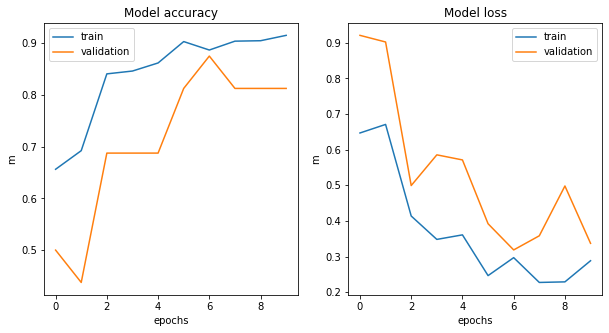

In [14]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

metric = ['accuracy', 'loss']
for i, m in enumerate(metric):
  ax[i].plot(history.history[m])
  ax[i].plot(history.history['val_'+ m])
  ax[i].set_title('Model {}'.format(m))
  ax[i].set_xlabel('epochs')
  ax[i].set_ylabel('m')
  ax[i].legend(['train', 'validation'])